In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf


# Data

In [5]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()



4422102/4422102 [==============================] - 0s 0us/step


In [16]:
from keras.datasets import fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]


In [17]:
X_train_full.shape, X_train.shape

((60000, 28, 28), (55000, 28, 28))

Let's scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255:

In [18]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

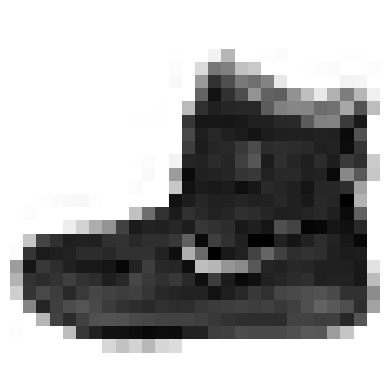

In [20]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [22]:
y_train, y_train.shape

(array([9, 0, 0, ..., 9, 0, 2], dtype=uint8), (55000,))

Here are the corresponding class names:

In [24]:
class_names = ["T-shirt/top", "Trouser", "Pullover",
                "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [25]:
class_names[y_train[0]]

'Ankle boot'

# Creating model using sequential API

## creating model

In [26]:
# extra code – clear the session to reset the name counters
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
(784+1)*300

235500

In [30]:
hidden1 = model.layers[1]
hidden1.name, hidden1

('dense', <keras.src.layers.core.dense.Dense at 0x2e7c1e6d0>)

## Parameter initialization

In [32]:
weights, biases = hidden1.get_weights()
weights, biases

(array([[-0.00127714, -0.02958883,  0.00137495, ..., -0.05744988,
         -0.05870515,  0.05779503],
        [-0.0685811 , -0.06263971, -0.01213191, ..., -0.02409911,
         -0.04077681, -0.00900082],
        [ 0.04358675, -0.03183129,  0.01353746, ..., -0.01058196,
          0.04420828, -0.045679  ],
        ...,
        [ 0.03319519, -0.05392835,  0.06181772, ..., -0.01290132,
         -0.03287591, -0.00175172],
        [ 0.01344904,  0.04315159, -0.01889871, ...,  0.00079735,
         -0.0184457 , -0.00941359],
        [-0.00841521,  0.0236082 , -0.06822592, ...,  0.00179816,
         -0.05378075,  0.02466656]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [33]:
weights.shape

(784, 300)

## Compiling the model

In [34]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

## Training and evaluating the model

In [35]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 1s 800us/step - loss: 0.7042 - accuracy: 0.7678 - val_loss: 0.5031 - val_accuracy: 0.8282
Epoch 2/30
1719/1719 [==============================] - 1s 714us/step - loss: 0.4866 - accuracy: 0.8308 - val_loss: 0.4598 - val_accuracy: 0.8354
Epoch 3/30
1719/1719 [==============================] - 1s 701us/step - loss: 0.4418 - accuracy: 0.8448 - val_loss: 0.4264 - val_accuracy: 0.8500
Epoch 4/30
1719/1719 [==============================] - 1s 687us/step - loss: 0.4179 - accuracy: 0.8536 - val_loss: 0.3972 - val_accuracy: 0.8602
Epoch 5/30
1719/1719 [==============================] - 1s 718us/step - loss: 0.3973 - accuracy: 0.8605 - val_loss: 0.3922 - val_accuracy: 0.8610
Epoch 6/30
1719/1719 [==============================] - 1s 826us/step - loss: 0.3806 - accuracy: 0.8656 - val_loss: 0.3962 - val_accuracy: 0.8590
Epoch 7/30
1719/1719 [==============================] - 1s 688us/step - loss: 0.3682 - accuracy: 0.8695 - val_loss: 0.3718 -

In [36]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

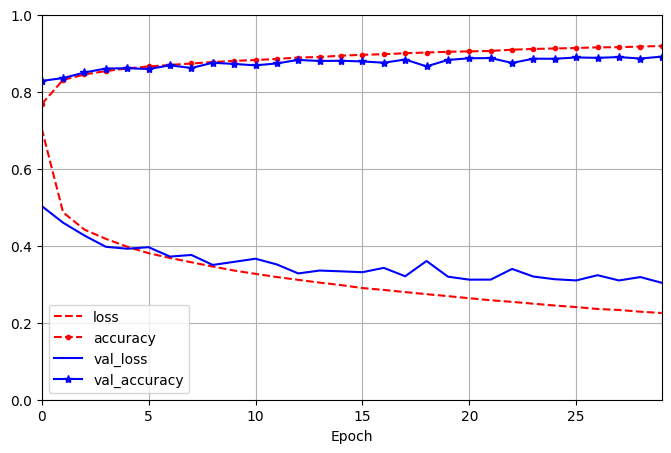

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code

plt.show()

In [40]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [41]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 574us/step - loss: 0.3278 - accuracy: 0.8842


[0.32779356837272644, 0.8841999769210815]

# Prediction

In [44]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 10ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [47]:
y_pred = y_proba.argmax(axis=1)
y_pred

array([9, 2, 1])

In [48]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')